In [5]:
import os

import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import snkit

plt.style.use("dark_background")

In [4]:
root_dir = ".."
save_dir = os.path.join(root_dir, "results/multi-modal_network/")
nodes = gpd.read_parquet(os.path.join(save_dir, "nodes.gpq"))
edges = gpd.read_parquet(os.path.join(save_dir, "edges.gpq"))

In [8]:
network = snkit.network.Network(edges=edges, nodes=nodes)
network = snkit.network.add_component_ids(network)

/home/fred/micromamba/envs/open-gira/lib/python3.10/site-packages/snkit/network.py:906: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  network.edges.geometry.length,


<Axes: >

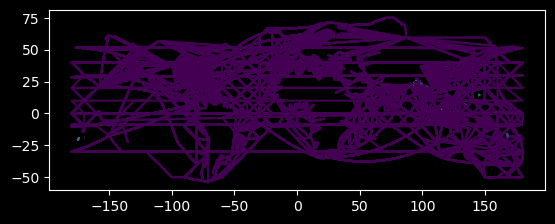

In [9]:
network.edges.plot("component_id")

<Axes: >

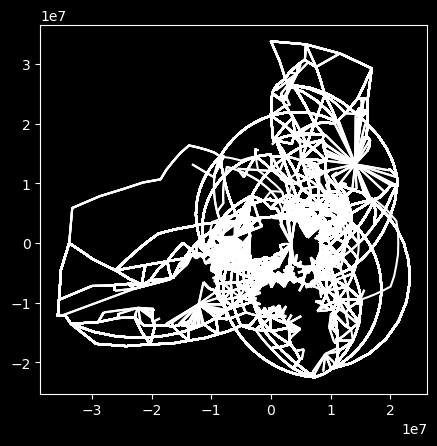

In [12]:
network.edges[network.edges.component_id == 1].to_crs(epsg=3995).plot()

<Axes: >

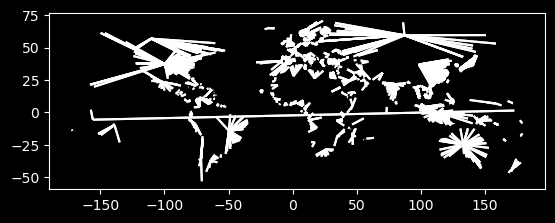

In [19]:
country_links = network.edges[network.edges["mode"] == "imaginary"]
country_links[country_links.component_id == 1].plot()